In [1]:
from torch import nn
import torch

##### Attention:
For this lab, there are no local answers for the questions in learntools. However, there are some assertions for the first 4 questions. You should pass all of the assertions before submitting to the autograding.

Some of the questions use mathematical symbols and equations to depict the scenario. These are just some basic "formal" definitions and you should understand them. In case you haven't understood them, read again and give yourself sometime to ponder. If there is any error or details in the questions that heavily confuse you, please post your concerns on Google Classroom. 

## Questions

### Q1: Given a function $f(x) = x^2 + 3x + 8$, return the gradient of $x$ when $x=2.0$ using pytorch autograd. The gradient tensor should have type torch.float32 and dim=0.

In [2]:
def exercise_1() -> torch.Tensor:
    x = torch.tensor(2.0, requires_grad=True)
    f = x**2 + 3*x + 8
    f.backward()
    return x.grad

ex1_sol = exercise_1()
assert torch.equal(ex1_sol, torch.tensor(7.0))

### Q2: A typical layer in a Neural Network would look like $f(x) = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b$, where $w_j$ is the j-th weight of the function and $b$ is its bias. This function outputs a result for a multi-dimension input, where $x_j$ is the j-th feature of the input. Implement this function, return the gradients of each weight for a given input `x` and the output using `tuple` with the formar `(output, weight_grads_tensor)`. The weights should be randomized using `torch.randn()` and the bias must be set to $5.0$. The input used by the autograder will be the same size as the one given below.

In [3]:
x = torch.tensor([1, 2, 3, 4, 5])

def exercise_2(x) -> tuple:
    # all the output and gradients are tensors

    torch.manual_seed(0) # must set seed=0 before random your weight
    weights = torch.randn(5, dtype=torch.float32, requires_grad=True)
    bias = torch.tensor(5.0)

    f = (weights*x).sum() + bias
    f.backward()
    
    return (f, weights.grad)
    # you must return in this format
    # return (output, weight_grads_tensor)

ex2_sol = exercise_2(x)

assert (ex2_sol[0] - torch.tensor(-3.7311) < 1e-4).item()
assert torch.equal(ex2_sol[1], torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32))

### Q3: Suppose each feature $x_j$ needs a separate function $f_j(x_j)$, where $f_j(x_j) = w_j x_j + b_j$. In other words, each feature requires a function, which has a separate set of 1 weight and 1 bias. Therefore, the output $y$ of your function $G(x)=[f_1(x_1), f_2(x_2), ..., f_n(x_n)]$ should be $y = [(w_1 x_1 + b_1), (w_2 x_2 + b_2), ..., (w_n x_n + b_n)]$ (**note:** these are matrices written lazily with markdown). Implement the function $G(x)$, return the output and the gradient sets for each function for a given `x`. The weights should be randomized using `torch.randn()`, and the bias is the same as $j$ of $f_j()$ (for example: $b_1 = 1.0$, $b_2 = 2.0$). The input used by the autograder will be the same size as the one given below.

In [5]:
x = torch.tensor([1, 2, 3, 4, 5])

def exercise_3(x) -> tuple:
     # all the output and gradients are tensors
    
    torch.manual_seed(0) # must set seed=0 before random your weight
    weights = torch.randn(len(x), dtype=torch.float32, requires_grad=True)
    bias = torch.arange(1,len(x)+1, dtype=torch.float32)
    y = weights*x + bias
    y.backward(torch.ones(len(x)))
    return (y, weights.grad)

    # raise NotImplementedError
    # you must return in this format
    # return (output, weight_grads_tensor)

ex3_sol = exercise_3(x)
assert torch.all((ex3_sol[0] - torch.tensor([ 2.5410,  1.4131, -3.5364,  6.2737, -0.4226 ], dtype=torch.float32)) < 5e-4).item()
assert torch.equal(ex3_sol[1], torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32))
# q3.check()

### Q4: Using the function $f(x)$ similar to the one in question 2, implement the function with random weights and bias (must use `torch.manual_seed(0)` before each initialization). Calculate the Mean Squared Error between the `target` and your function prediction on the `data` as a loss metric, then return a tuple containing the gradients of your function weights and bias based on the calculated loss.

In [4]:
data = torch.tensor([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0])
target = torch.tensor([2.0])

def exercise_4(data, target) -> tuple:
    # both gradients are tensors
    torch.manual_seed(0) # must set seed=0 before random your weight
    weights = torch.randn(10, dtype=torch.float32, requires_grad=True)
    bias = torch.randn(1, dtype=torch.float32, requires_grad=True)

    pred = (weights@data) + bias
    print(pred)
    loss = torch.mean((pred - target) ** 2)
    loss.backward()

    return(weights.grad, bias.grad)

    # raise NotImplementedError
    # you must return in this format
    # return (weight_grads_tensor, bias_grads_tensor)

ex4_sol = exercise_4(data, target)
assert ex4_sol[0].dim() == 1 and ex4_sol[1].dim() == 1, print("All tensors must have dim == 1")
assert torch.all((ex4_sol[0] - torch.tensor([-85.1518, -127.7277, -170.3036, -212.8795, -255.4553, -298.0312, -340.6071, -383.1830, -425.7589, -468.3348], dtype=torch.float32)) < 5e-4)
assert torch.all((ex4_sol[1] - torch.tensor([-42.5759], dtype=torch.float32)) < 5e-4)

tensor([-21.4256], grad_fn=<AddBackward0>)


### Q5: This question worth 40% the points of this lab. Your solution for this question will be graded manually by the TAs, hence you will be informed later for the total points for this lab after the deadline has been met.

**Note**: This question will not focus on getting the right results as your implementation is more important. Therefore there will be no local answer or autograding.

#### Create a small neural network consisting 2 Linear layers, each followed by a Sigmoid activation function. The template code has been provided below including the return format (`x` should be replaced by the final `tensor` after the forward pass). Your code must use layers and functions provided by `pytorch`. Initialize all necessary components that can be used during the training phase including a Binary Cross Entropy Loss function and a Gradient Descent optimizer. Train your model for 2 epochs with a proper train loop, then make a prediction on a given `val_x` and return your prediction.

**Note**: the first Linear Layer can have any `in_features` and `out_features`, but the last Linear Layer must have `out_features=2`. Your model will consume the whole input for each epoch, so you don't need to separate the input into batches.

*Context*: This part is not necessary for your implementation, but it could help you to understand the work that your network is simulating. The `train_x` consists grades for 5 subjects of 20 students, with the minimum grade is 1 and the maximum is 10. The problem is a classification task, when your model predicts if a student is good or bad based on their 5 grades. That is the reason why the final layer must have 2 output features, which correspond to the 2 classes "good" and "bad".

Adam - Epoch 1, Loss: 0.6278
Adam - Epoch 2, Loss: 0.6032
True val classes: ['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad']
Predicted classes: ['bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good']
Accuracy: 70.00%


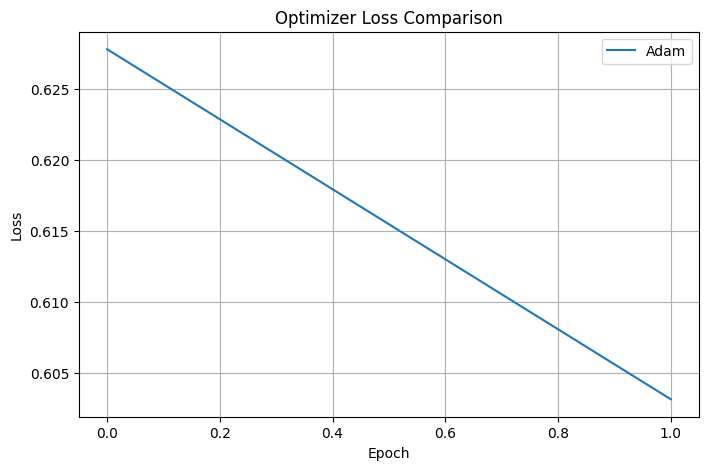

In [62]:
train_x = torch.randint(1, 10, (20, 5), dtype=torch.float32) # input
train_y = (train_x.sum(1) > 30).float() # target, which means the total score of 5 subjects for each student must > 30, in order to be True 1.0, or False 0.0 otherwise

val_x = torch.randint(3, 10, (10, 5), dtype=torch.float32)

def exercise_5(train_x, train_y, val_x) -> torch.Tensor:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F

    class MyNetwork(nn.Module):
        def __init__(self):
            super().__init__()
            self.linear1 = nn.Linear(5, 6)
            self.linear2 = nn.Linear(6, 2) # 2 output features

        def forward(self, x):
            x = torch.sigmoid(self.linear1(x))
            x = torch.sigmoid(self.linear2(x))
            return x

    # Prepare labels
    train_y_onehot = F.one_hot(train_y.long(), num_classes=2).float()

    # Loss function
    loss_fn = nn.BCELoss()

    # Track loss history
    loss_history = {}

    # Model and Adam optimizer
    name = "Adam"
    model = MyNetwork()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    losses = []
    
    for e in range(2):
        model.train()
        predicted_probs = model(train_x)
        loss = loss_fn(predicted_probs, train_y_onehot)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        print(f"{name} - Epoch {e+1}, Loss: {loss.item():.4f}")

    loss_history[name] = losses

    # Evaluation
    model.eval()
    with torch.no_grad():
        val_preds = model(val_x)
        predictions = (val_preds[:,1] >= 0.5).int()

        class_map = {0: "bad", 1: "good"}
        predicted_classes = [class_map[int(c.item())] for c in predictions]

        true_labels = (val_x.sum(1) > 30).int()
        true_val_classes = [class_map[int(c.item())] for c in true_labels]

        print("True val classes:", true_val_classes)
        print("Predicted classes:", predicted_classes)

        accuracy = (predictions == true_labels).float().mean().item() * 100
        print(f"Accuracy: {accuracy:.2f}%")


    # Visualization
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    for name, losses in loss_history.items():
        plt.plot(losses, label=name)
    plt.title("Optimizer Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    return predictions


ex5_sol = exercise_5(train_x=train_x, train_y=train_y, val_x=val_x)
# print(train_x)